In [1]:
#importing modules into jupyterlab
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()

In [2]:
#importing  data  
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Data file\\AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#removing the outlier using quantile
lower_outlier =df["price"].quantile(0.01)
upper_outlier = df["price"].quantile(0.98)
upper_outlier

550.0

In [6]:
no_outlier = df[(df['price']>lower_outlier)&(df['price']<upper_outlier)]

In [7]:
no_outlier.shape

(47250, 16)

In [8]:
no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47250 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47250 non-null  int64  
 1   name                            47234 non-null  object 
 2   host_id                         47250 non-null  int64  
 3   host_name                       47230 non-null  object 
 4   neighbourhood_group             47250 non-null  object 
 5   neighbourhood                   47250 non-null  object 
 6   latitude                        47250 non-null  float64
 7   longitude                       47250 non-null  float64
 8   room_type                       47250 non-null  object 
 9   price                           47250 non-null  int64  
 10  minimum_nights                  47250 non-null  int64  
 11  number_of_reviews               47250 non-null  int64  
 12  last_review                     37754

In [9]:
df.shape[0] - no_outlier.shape[0]

1645

1645 outliers were removed from the dataset of price

In [10]:
df2 = pd.read_csv("C:\\Users\HP\\OneDrive\\Desktop\\Data file\\weight-height.csv")
df2

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_13644\1658083131.py:1: SyntaxWarning: invalid escape sequence '\H'
  df2 = pd.read_csv("C:\\Users\HP\\OneDrive\\Desktop\\Data file\\weight-height.csv")


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [12]:
df2.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


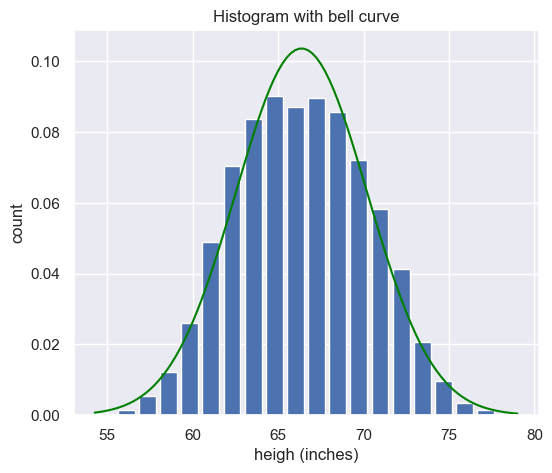

In [13]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(6,5))
plt.hist(df2["Height"], bins=20, rwidth=0.8, density=True)
plt.xlabel("heigh (inches)")
plt.ylabel("count")
plt.title("Histogram with bell curve")
rng = np.linspace(min(df2["Height"]), max(df2["Height"]), 100)
plt.plot(rng, norm.pdf(rng, df2["Height"].mean(), df2["Height"].std()), color="green", label="Bell Curve")


plt.show()



In [14]:
#removing the outlier using 3 standard deviation from below and above 
lower_outlier = df2["Height"].mean() - 3*df2["Height"].std()
upper_outlier = df2["Height"].mean() + 3*df2["Height"].std()
lower_outlier, upper_outlier

(54.82497539250154, 77.91014411714094)

In [15]:
outlier_remove = df2[(df2["Height"] > lower_outlier) & (df2["Height"]<upper_outlier)]    

In [16]:
#the number of outlier remove from height dataset
outlier_remove["Height"].shape[0]*100/df2["Height"].shape[0]

99.93

In [17]:
df2["Weight"].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

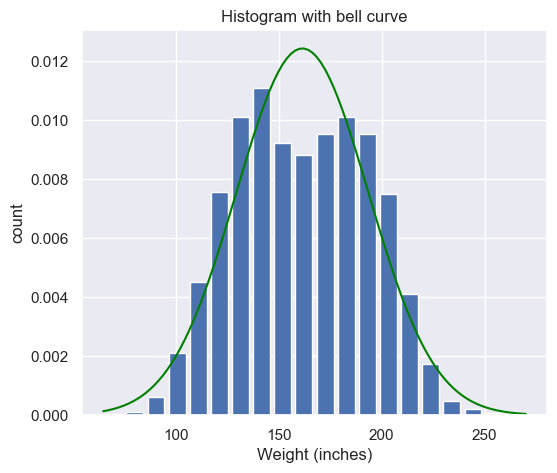

In [18]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(6,5))
plt.hist(df2["Weight"], bins=20, rwidth=0.8, density=True)
plt.xlabel("Weight (inches)")
plt.ylabel("count")
plt.title("Histogram with bell curve")
rng = np.linspace(min(df2["Weight"]), max(df2["Weight"]), 100)
plt.plot(rng, norm.pdf(rng, df2["Weight"].mean(), df2["Weight"].std()), color="green", label="Bell Curve")


plt.show()


In [19]:
#removing the outliers using quantile
Q1 = df2["Weight"].quantile(0.05)
Q3 = df2["Weight"].quantile(0.95)
IQR = Q3 - Q1
#calculating lower and higher outlier
lower = Q1 - 1.5*IQR
upper = Q1 + 1.5*IQR

outlier_removed = df2[(df2["Weight"]>lower) & (df2["Weight"]<upper)]


In [20]:
Q1,Q3, IQR

(111.09838834744545, 211.76755583198874, 100.6691674845433)

In [21]:
outlier_removed

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


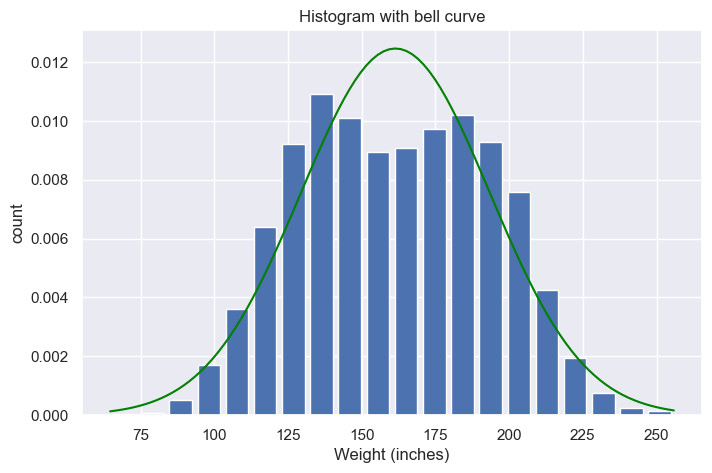

In [22]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(8,5))
plt.hist(outlier_removed["Weight"], bins=20, rwidth=0.8, density=True)
plt.xlabel("Weight (inches)")
plt.ylabel("count")
plt.title("Histogram with bell curve")
rng = np.linspace(min(outlier_removed["Weight"]), max(outlier_removed["Weight"]), 100)
plt.plot(rng, norm.pdf(rng, outlier_removed["Weight"].mean(), outlier_remove["Weight"].std()), color="green", label="Bell Curve")


plt.show()
